In [1]:
install.packages("caret")
install.packages("e1071")
install.packages("predictmeans")
install.packages("gvlma")
install.packages("popbio")
install.packages("anytime")

Installing package into 'C:/Users/pablo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pablo\AppData\Local\Temp\RtmpW0ev4L\downloaded_packages


Installing package into 'C:/Users/pablo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pablo\AppData\Local\Temp\RtmpW0ev4L\downloaded_packages


Installing package into 'C:/Users/pablo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'predictmeans' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pablo\AppData\Local\Temp\RtmpW0ev4L\downloaded_packages


Installing package into 'C:/Users/pablo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'gvlma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pablo\AppData\Local\Temp\RtmpW0ev4L\downloaded_packages


Installing package into 'C:/Users/pablo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'popbio' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pablo\AppData\Local\Temp\RtmpW0ev4L\downloaded_packages


Installing package into 'C:/Users/pablo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'anytime' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pablo\AppData\Local\Temp\RtmpW0ev4L\downloaded_packages


In [2]:
library("readr")
library("IDPmisc")
library("anytime")
library("car")
library("caret")
library("gvlma")
library("predictmeans")
library("e1071")
library("magrittr")
library("dplyr")
library("tidyr")
library("lmtest")
library("popbio")

Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'IDPmisc' was built under R version 3.6.2"Warning message:
"package 'anytime' was built under R version 3.6.3"Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'predictmeans' was built under R version 3.6.3"Loading required package: lme4
Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix
Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod 

In [3]:
compas_scores_raw <- read_csv("C:/Users/pablo/OneDrive/Escritorio/Proyecto Final WozU Git/COMPAS/compas-scores-raw.csv")
cox_violent_parsed <- read_csv("C:/Users/pablo/OneDrive/Escritorio/Proyecto Final WozU Git/COMPAS/COMPAS DATA FILES INPUT/cox-violent-parsed.csv")
cox_violent_parsed_filt <- read_csv("C:/Users/pablo/OneDrive/Escritorio/Proyecto Final WozU Git/COMPAS/COMPAS DATA FILES INPUT/cox-violent-parsed_filt.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  Person_ID = col_double(),
  AssessmentID = col_double(),
  Case_ID = col_double(),
  ScaleSet_ID = col_double(),
  RecSupervisionLevel = col_double(),
  Scale_ID = col_double(),
  RawScore = col_double(),
  DecileScore = col_double(),
  IsCompleted = col_double(),
  IsDeleted = col_double()
)
See spec(...) for full column specifications.
Warning message:
"Duplicated column names deduplicated: 'decile_score' => 'decile_score_1' [40], 'priors_count' => 'priors_count_1' [49]"Parsed with column specification:
cols(
  .default = col_character(),
  id = col_double(),
  age = col_double(),
  juv_fel_count = col_double(),
  decile_score = col_double(),
  juv_misd_count = col_double(),
  juv_other_count = col_double(),
  priors_count = col_double(),
  days_b_screening_arrest = col_double(),
  c_days_from_compas = col_double(),
  is_recid = col_double(),
  r_days_from_arrest = col_double(),
  violent_recid = col_logical(),
 

In [6]:
datasets_1498_2680_propublicaCompassRecividism_data_fairml <- read_csv("C:/Users/pablo/OneDrive/Escritorio/Proyecto Final WozU Git/COMPAS/COMPAS DATA FILES INPUT/datasets_1498_2680_propublicaCompassRecividism_data_fairml.csv_propublica_data_for_fairml.csv")


Parsed with column specification:
cols(
  Two_yr_Recidivism = col_double(),
  Number_of_Priors = col_double(),
  score_factor = col_double(),
  Age_Above_FourtyFive = col_double(),
  Age_Below_TwentyFive = col_double(),
  African_American = col_double(),
  Asian = col_double(),
  Hispanic = col_double(),
  Native_American = col_double(),
  Other = col_double(),
  Female = col_double(),
  Misdemeanor = col_double()
)


In [7]:
logit_input <- datasets_1498_2680_propublicaCompassRecividism_data_fairml

Testing LOGISTIC REGRESSION on COMPAS PROPUBLICA FILE (using binary output "Two_yr_Recidivism" as DV Variable)

We will check how good predictors are some IV (like race, etc)
Now we do a trial with a one-to-one (one IV, one DV), then with all the factors/IV
Our DV is Two_yr_Recidivism

In [8]:
ylogit_propub <- glm(Two_yr_Recidivism ~ ., data=logit_input, family="binomial")

In [9]:
probabilities <- predict(ylogit_propub, type = "response")

In [10]:
logit_input$Pred_rec <- ifelse(probabilities > .5,"pos","neg")
logit_input$Pred_recR <- NA
logit_input$Pred_recR[logit_input$Pred_rec=='pos'] <- 1
logit_input$Pred_recR[logit_input$Pred_rec=='neg'] <- 0

In [11]:
head(logit_input)

Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor,Pred_rec,Pred_recR
0,0,0,1,0,0,0,0,0,1,0,0,neg,0
1,0,0,0,0,1,0,0,0,0,0,0,neg,0
1,4,0,0,1,1,0,0,0,0,0,0,pos,1
0,0,0,0,0,0,0,0,0,1,0,1,neg,0
1,14,1,0,0,0,0,0,0,0,0,0,pos,1
0,3,0,0,0,0,0,0,0,1,0,0,neg,0


In [12]:
logit_input3 <- logit_input
logit_input3$Pred_recR <- as.factor(logit_input$Pred_recR)
logit_input3$Two_yr_Recidivism <- as.factor(logit_input$Two_yr_Recidivism)

In [13]:
head(logit_input3)

Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor,Pred_rec,Pred_recR
0,0,0,1,0,0,0,0,0,1,0,0,neg,0
1,0,0,0,0,1,0,0,0,0,0,0,neg,0
1,4,0,0,1,1,0,0,0,0,0,0,pos,1
0,0,0,0,0,0,0,0,0,1,0,1,neg,0
1,14,1,0,0,0,0,0,0,0,0,0,pos,1
0,3,0,0,0,0,0,0,0,1,0,0,neg,0


CONFUSION MATRIX ON LOGIT

In [15]:
confusion_mat_recidivism <- caret::confusionMatrix(logit_input3$Two_yr_Recidivism, logit_input3$Pred_recR)
confusion_mat_recidivism

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2583  780
         1 1202 1607
                                          
               Accuracy : 0.6789          
                 95% CI : (0.6671, 0.6905)
    No Information Rate : 0.6133          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3444          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.6824          
            Specificity : 0.6732          
         Pos Pred Value : 0.7681          
         Neg Pred Value : 0.5721          
             Prevalence : 0.6133          
         Detection Rate : 0.4185          
   Detection Prevalence : 0.5449          
      Balanced Accuracy : 0.6778          
                                          
       'Positive' Class : 0               
                        

ASSUMPTION TESTINGS

LOGIT LINEARITY

In [ ]:
# We keep only fields that are numeric

In [17]:
logit_input_num <- logit_input %>% dplyr::select_if(is.numeric)
predictors_num <- colnames(logit_input_num)
logit_input_num <- logit_input_num %>% mutate(logit=log(probabilities/(1-probabilities))) %>% gather(key= "predictors_num", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'


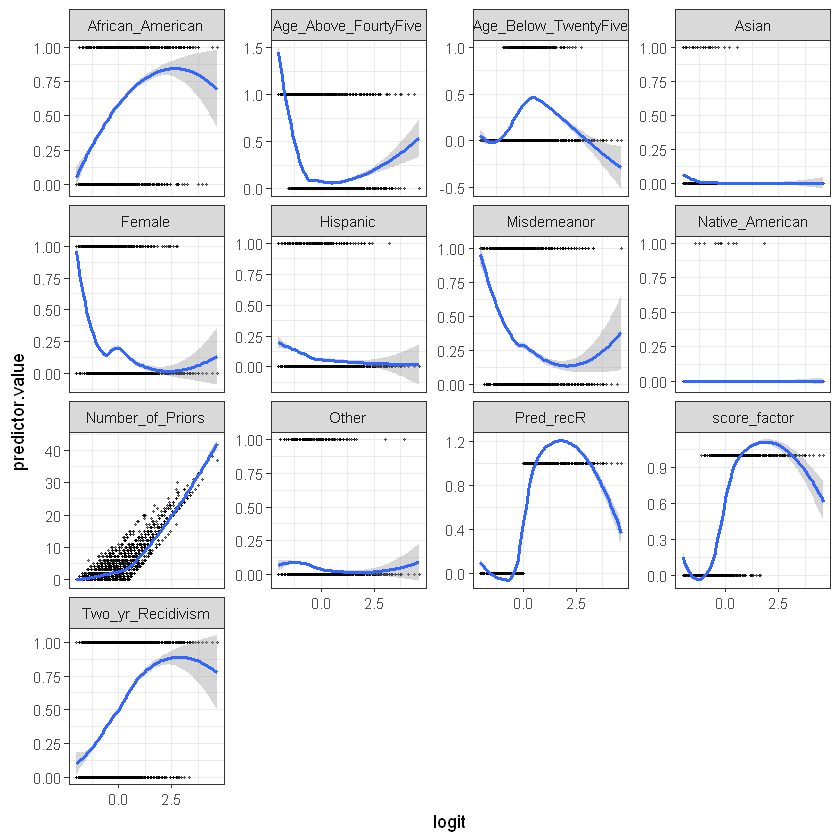

In [18]:
# Now we graph
ggplot(logit_input_num, aes(logit, predictor.value))+ geom_point(size=.5, alpha=.5)+ geom_smooth(method= "loess")+ theme_bw()+ facet_wrap(~predictors_num, scales="free_y")
#

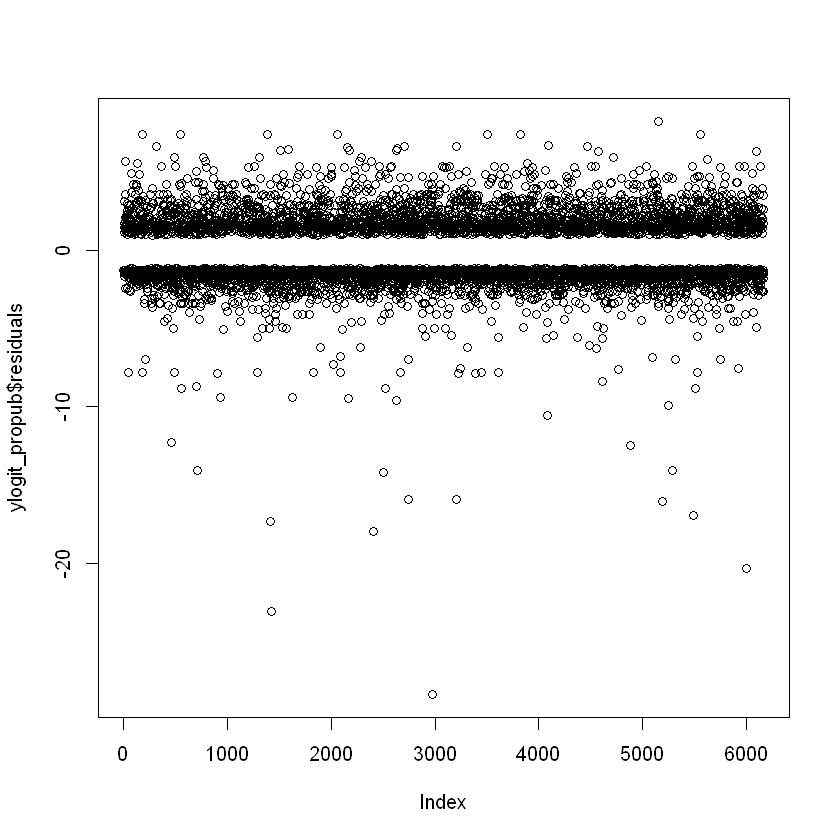

In [19]:
plot(ylogit_propub$residuals)

In [20]:
dwtest(ylogit_propub, alternative="two.sided")


	Durbin-Watson test

data:  ylogit_propub
DW = 2.0276, p-value = 0.2781
alternative hypothesis: true autocorrelation is not 0


In [21]:
infl <- influence.measures(ylogit_propub)
summary(infl)

Potentially influential observations of
	 glm(formula = Two_yr_Recidivism ~ ., family = "binomial", data = logit_input) :

     dfb.1_ dfb.N__P dfb.scr_ dfb.A_A_ dfb.A_B_ dfb.Af_A dfb.Asin dfb.Hspn
132  -0.01   0.02     0.01     0.02     0.00     0.00     0.00     0.00   
409  -0.01   0.01    -0.02     0.01     0.02     0.00    -0.18     0.00   
414  -0.01   0.00     0.03     0.04    -0.01     0.00     0.27     0.00   
424   0.02  -0.09     0.04    -0.02    -0.03     0.01     0.00    -0.06   
580   0.00  -0.01     0.02     0.00     0.02    -0.01     0.24     0.00   
647   0.00   0.01    -0.01     0.01     0.01     0.00     0.00     0.00   
846  -0.01   0.04    -0.02     0.01     0.01     0.00     0.00     0.03   
988  -0.01  -0.01    -0.01     0.01     0.01     0.00     0.00     0.00   
1000  0.00   0.01     0.01     0.00     0.00     0.00     0.00     0.00   
1010  0.00   0.00     0.01     0.01    -0.02     0.00    -0.16     0.00   
1095 -0.01   0.00     0.01     0.01     0.01     0.0

In [22]:
summary(ylogit_propub)


Call:
glm(formula = Two_yr_Recidivism ~ ., family = "binomial", data = logit_input)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5875  -0.9257  -0.6413   1.0355   2.0572  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.793407   0.067365 -11.778  < 2e-16 ***
Number_of_Priors      0.131516   0.008431  15.599  < 2e-16 ***
score_factor          0.706420   0.063352  11.151  < 2e-16 ***
Age_Above_FourtyFive -0.516489   0.077557  -6.660 2.75e-11 ***
Age_Below_TwentyFive  0.540449   0.071805   7.527 5.21e-14 ***
African_American      0.026285   0.063804   0.412  0.68037    
Asian                -0.519606   0.432354  -1.202  0.22944    
Hispanic             -0.120019   0.110257  -1.089  0.27635    
Native_American      -0.456590   0.655601  -0.696  0.48615    
Other                -0.058954   0.129012  -0.457  0.64769    
Female               -0.379289   0.072906  -5.202 1.97e-07 ***
Misdemeanor          -0.178525

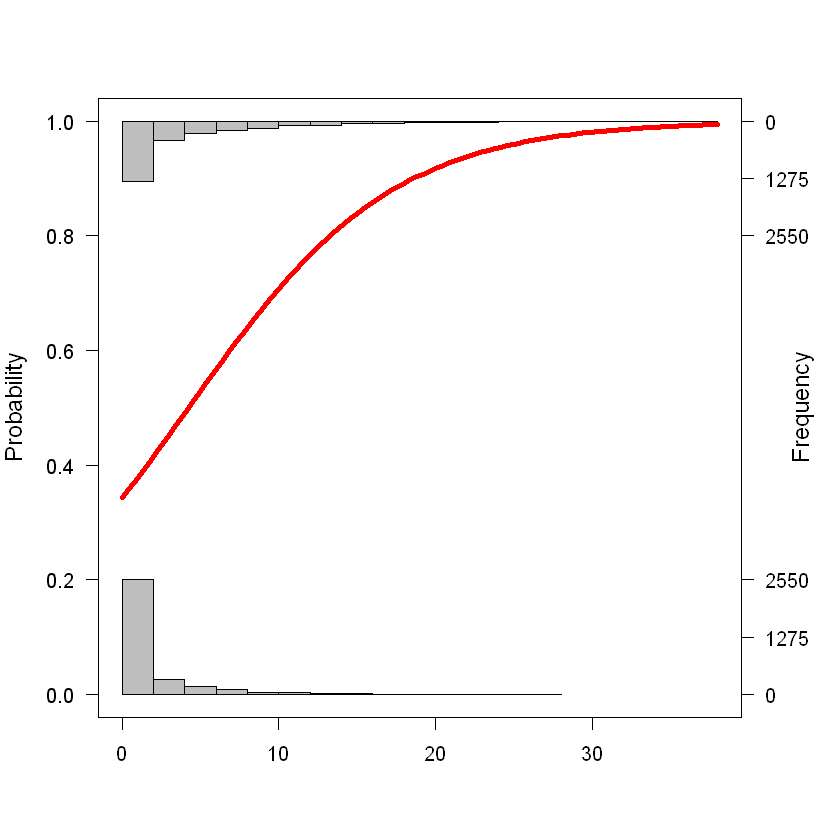

In [23]:
logi.hist.plot(logit_input$Number_of_Priors,logit_input$Two_yr_Recidivism, boxp=FALSE, type="hist", col="gray")

In [24]:
################################################
# This section creates a function called       #
# logisticPseudoR2s().  To use it              #
# type logisticPseudoR2s(myLogisticModel)      #
################################################
logisticPseudoR2s <- function(LogModel) {
  dev <- LogModel$deviance 
  nullDev <- LogModel$null.deviance 
  modelN <-  length(LogModel$fitted.values)
  R.l <-  1 -  dev / nullDev
  R.cs <- 1- exp ( -(nullDev - dev) / modelN)
  R.n <- R.cs / ( 1 - ( exp (-(nullDev / modelN))))
  cat("Pseudo R^2 for logistic regression\n")
  cat("Hosmer and Lemeshow R^2  ", round(R.l, 3), "\n")
  cat("Cox and Snell R^2        ", round(R.cs, 3), "\n")
  cat("Nagelkerke R^2           ", round(R.n, 3),    "\n")
}
############End of function ######################

In [25]:
logisticPseudoR2s(ylogit_propub)

Pseudo R^2 for logistic regression
Hosmer and Lemeshow R^2   0.124 
Cox and Snell R^2         0.157 
Nagelkerke R^2            0.21 


In [26]:
step(ylogit_propub,direction = 'backward')

Start:  AIC=7475.92
Two_yr_Recidivism ~ Number_of_Priors + score_factor + Age_Above_FourtyFive + 
    Age_Below_TwentyFive + African_American + Asian + Hispanic + 
    Native_American + Other + Female + Misdemeanor

                       Df Deviance    AIC
- African_American      1   7452.1 7474.1
- Other                 1   7452.1 7474.1
- Native_American       1   7452.4 7474.4
- Hispanic              1   7453.1 7475.1
- Asian                 1   7453.5 7475.5
<none>                      7451.9 7475.9
- Misdemeanor           1   7460.9 7482.9
- Female                1   7479.4 7501.4
- Age_Above_FourtyFive  1   7497.5 7519.5
- Age_Below_TwentyFive  1   7508.7 7530.7
- score_factor          1   7576.2 7598.2
- Number_of_Priors      1   7749.3 7771.3

Step:  AIC=7474.08
Two_yr_Recidivism ~ Number_of_Priors + score_factor + Age_Above_FourtyFive + 
    Age_Below_TwentyFive + Asian + Hispanic + Native_American + 
    Other + Female + Misdemeanor

                       Df Deviance    AIC


Call:  glm(formula = Two_yr_Recidivism ~ Number_of_Priors + score_factor + 
    Age_Above_FourtyFive + Age_Below_TwentyFive + Female + Misdemeanor, 
    family = "binomial", data = logit_input)

Coefficients:
         (Intercept)      Number_of_Priors          score_factor  
             -0.8046                0.1327                0.7187  
Age_Above_FourtyFive  Age_Below_TwentyFive                Female  
             -0.5197                0.5420               -0.3741  
         Misdemeanor  
             -0.1814  

Degrees of Freedom: 6171 Total (i.e. Null);  6165 Residual
Null Deviance:	    8506 
Residual Deviance: 7456 	AIC: 7470

In [33]:
# NOTE/COMMENTS:
# FIRST CONCLUTION\NOTE:
# Backward step doesn´t "keep" african race as DV so the factor "race" doesn't seem relevant. (HOWEVER "Backward KEEPS SEX AND AGE (??) hOW DO WE DRAW ADITIONAL CONCLUTIONS ON THIS?)
# We need to discuss if the remaing factors lead us to any conclusion.

In [45]:
modelpropub_priors <- lm(Number_of_Priors ~ ., data=logit_input)
summary(modelpropub_priors)


Call:
lm(formula = Number_of_Priors ~ ., data = logit_input)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4262 -2.0713 -0.6898  1.4519 28.7988 

Coefficients: (1 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.77308    0.11238   6.879 6.62e-12 ***
Two_yr_Recidivism     1.28572    0.09591  13.405  < 2e-16 ***
score_factor         -0.86576    0.14428  -6.001 2.08e-09 ***
Age_Above_FourtyFive  1.48940    0.11659  12.774  < 2e-16 ***
Age_Below_TwentyFive -4.15521    0.11484 -36.182  < 2e-16 ***
African_American      0.82145    0.10242   8.020 1.25e-15 ***
Asian                 0.39246    0.63229   0.621   0.5348    
Hispanic              0.29012    0.17306   1.676   0.0937 .  
Native_American       2.68281    1.05608   2.540   0.0111 *  
Other                 0.17655    0.20414   0.865   0.3872    
Female                0.03383    0.11650   0.290   0.7715    
Misdemeanor          -0.22502    0.09560  -2

In [46]:
step(modelpropub_priors,direction = 'backward')

Start:  AIC=15441.8
Number_of_Priors ~ Two_yr_Recidivism + score_factor + Age_Above_FourtyFive + 
    Age_Below_TwentyFive + African_American + Asian + Hispanic + 
    Native_American + Other + Female + Misdemeanor + Pred_rec + 
    Pred_recR


Step:  AIC=15441.8
Number_of_Priors ~ Two_yr_Recidivism + score_factor + Age_Above_FourtyFive + 
    Age_Below_TwentyFive + African_American + Asian + Hispanic + 
    Native_American + Other + Female + Misdemeanor + Pred_rec

                       Df Sum of Sq   RSS   AIC
- Female                1       1.0 75019 15440
- Asian                 1       4.7 75022 15440
- Other                 1       9.1 75027 15440
<none>                              75018 15442
- Hispanic              1      34.2 75052 15443
- Misdemeanor           1      67.5 75085 15445
- Native_American       1      78.6 75096 15446
- score_factor          1     438.6 75456 15476
- African_American      1     783.5 75801 15504
- Age_Above_FourtyFive  1    1987.6 77005 15601
-


Call:
lm(formula = Number_of_Priors ~ Two_yr_Recidivism + score_factor + 
    Age_Above_FourtyFive + Age_Below_TwentyFive + African_American + 
    Hispanic + Native_American + Misdemeanor + Pred_rec, data = logit_input)

Coefficients:
         (Intercept)     Two_yr_Recidivism          score_factor  
              0.8146                1.2832               -0.8652  
Age_Above_FourtyFive  Age_Below_TwentyFive      African_American  
              1.4840               -4.1508                0.7925  
            Hispanic       Native_American           Misdemeanor  
              0.2581                2.6528               -0.2265  
         Pred_recpos  
              6.4010  


WE HAVE NOT TESTED ASSUMPTIONS HERE!!! KEEP THIS IN MIND!!!

In [47]:
modelpropub_priors_reduced <- lm(formula = Number_of_Priors ~ Two_yr_Recidivism + score_factor + 
                                   Age_Above_FourtyFive + Age_Below_TwentyFive + African_American + 
                                   Female + Misdemeanor, data = logit_input)
summary(modelpropub_priors_reduced)


Call:
lm(formula = Number_of_Priors ~ Two_yr_Recidivism + score_factor + 
    Age_Above_FourtyFive + Age_Below_TwentyFive + African_American + 
    Female + Misdemeanor, data = logit_input)

Residuals:
   Min     1Q Median     3Q    Max 
-8.949 -2.377 -0.643  1.371 30.137 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.1959     0.1148  10.416  < 2e-16 ***
Two_yr_Recidivism      1.8246     0.1074  16.985  < 2e-16 ***
score_factor           3.4274     0.1131  30.309  < 2e-16 ***
Age_Above_FourtyFive   1.3196     0.1315  10.038  < 2e-16 ***
Age_Below_TwentyFive  -3.3948     0.1281 -26.494  < 2e-16 ***
African_American       1.1810     0.1053  11.217  < 2e-16 ***
Female                -0.9309     0.1289  -7.224 5.68e-13 ***
Misdemeanor           -0.7666     0.1071  -7.160 8.99e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.947 on 6164 degrees of freedom
Multiple R-squared:  0.308


Keeping in mind we still need to test assumptions, Number_of_Priors seems influenced by African_Amerinca (dummy coded IV of ethnic/race)


In [34]:
########################################################################################################################
###################################### PART 2 DATA TESTING COMPAS SCORES RAW FILES #####################################
########################################################################################################################

###################################################################################################################################
# First, we will do "some work" on  compas-scores-raw.csv file
###################################################################################################################################

In [27]:
# To remove NA´s fields & We remove rows for Persons with "weird" birthdates 
compas_scores2 <- na.omit(compas_scores_raw)
compas_scores3 <- NaRV.omit(compas_scores2)
# No change, after running the line above. :)
# after group virtual zoom we decided to remove these four rows:
compas_scores4 <-compas_scores3[!(compas_scores3$Person_ID=="51157" | compas_scores3$Person_ID=="57823"),]
compas_scores5 <-compas_scores4[!(compas_scores4$Person_ID=="62384" | compas_scores4$Person_ID=="54272"),]

In [28]:
# We merge first and last name into a new column named ID_name & we write a new csv file on current directory
compas_scores5$DateOfBirth <- as.Date(compas_scores5$DateOfBirth, format = "%m/%d/%y")
compas_scores5$ID_name <- paste(compas_scores5$FirstName,compas_scores5$LastName, compas_scores5$DateOfBirth)
# we change column "name" to "ID_name" & we write a new csv file on current directory
cox_violent_parsed_filt$dob <- as.Date(cox_violent_parsed_filt$dob, format = "%d/%m/%y")
cox_violent_parsed_filt$ID_name <- paste(cox_violent_parsed_filt$first, cox_violent_parsed_filt$last, cox_violent_parsed_filt$dob)

In [30]:
head(compas_scores5)

Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted,ID_name
50844,57167,51950,PRETRIAL,Fisher,Kevin,NULL,Male,Caucasian,1992-12-05,...,Low,7,Risk of Violence,-2.08,4,Low,New,1,0,Kevin Fisher 1992-12-05
50844,57167,51950,PRETRIAL,Fisher,Kevin,NULL,Male,Caucasian,1992-12-05,...,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0,Kevin Fisher 1992-12-05
50844,57167,51950,PRETRIAL,Fisher,Kevin,NULL,Male,Caucasian,1992-12-05,...,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0,Kevin Fisher 1992-12-05
50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NULL,Male,Caucasian,1984-09-16,...,Low,7,Risk of Violence,-2.84,2,Low,New,1,0,KEVIN KENDALL 1984-09-16
50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NULL,Male,Caucasian,1984-09-16,...,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0,KEVIN KENDALL 1984-09-16
50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NULL,Male,Caucasian,1984-09-16,...,Low,18,Risk of Failure to Appear,19.00,3,Low,New,1,0,KEVIN KENDALL 1984-09-16


In [31]:
head(cox_violent_parsed_filt)

id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,type_of_assessment,decile_score_1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count_1,event,ID_name
1,miguel hernandez,miguel,hernandez,Male,2019-04-18,69,Greater than 45,Other,0,...,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0,miguel hernandez 2019-04-18
2,miguel hernandez,miguel,hernandez,Male,2019-04-18,69,Greater than 45,Other,0,...,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0,miguel hernandez 2019-04-18
3,michael ryan,michael,ryan,Male,2019-02-06,31,25 - 45,Caucasian,0,...,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0,michael ryan 2019-02-06
4,kevon dixon,kevon,dixon,Male,2019-01-22,34,25 - 45,African-American,0,...,Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1,kevon dixon 2019-01-22
5,ed philo,ed,philo,Male,2019-05-14,24,Less than 25,African-American,0,...,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0,ed philo 2019-05-14
6,ed philo,ed,philo,Male,2019-05-14,24,Less than 25,African-American,0,...,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0,ed philo 2019-05-14


In [32]:
################################################
#       THEN WE REMOVE SOME COLUMNS :          #
################################################
# Next step, we create a vector "drofromraw"with all colunms selected for removal. (feel free to change if needed)

In [35]:
dropfromraw <- c("Person_ID", "AssessmentID", "Case_ID", "LastName", "FirstName", "MiddleName", "Screening_Date", "ScaleSet", "Screening_Date", "RecSupervisionLevelText", "DisplayText", "RawScore", "AssessmentReason","IsCompleted", "IsDeleted","ID_name")
compas_scores_redcol = compas_scores5[,!(names(compas_scores5) %in% dropfromraw)]

In [36]:
head(compas_scores_redcol)

Agency_Text,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,Scale_ID,DecileScore,ScoreText,AssessmentType
PRETRIAL,Male,Caucasian,1992-12-05,22,English,Pretrial,Jail Inmate,Single,1,7,4,Low,New
PRETRIAL,Male,Caucasian,1992-12-05,22,English,Pretrial,Jail Inmate,Single,1,8,2,Low,New
PRETRIAL,Male,Caucasian,1992-12-05,22,English,Pretrial,Jail Inmate,Single,1,18,1,Low,New
PRETRIAL,Male,Caucasian,1984-09-16,22,English,Pretrial,Jail Inmate,Married,1,7,2,Low,New
PRETRIAL,Male,Caucasian,1984-09-16,22,English,Pretrial,Jail Inmate,Married,1,8,1,Low,New
PRETRIAL,Male,Caucasian,1984-09-16,22,English,Pretrial,Jail Inmate,Married,1,18,3,Low,New


In [37]:
summary(compas_scores_redcol)

 Agency_Text        Sex_Code_Text      Ethnic_Code_Text    DateOfBirth        
 Length:60831       Length:60831       Length:60831       Min.   :1969-01-01  
 Class :character   Class :character   Class :character   1st Qu.:1981-09-20  
 Mode  :character   Mode  :character   Mode  :character   Median :1988-09-26  
                                                          Mean   :2000-11-09  
                                                          3rd Qu.:1994-11-01  
                                                          Max.   :2068-12-28  
  ScaleSet_ID      Language         LegalStatus        CustodyStatus     
 Min.   :17.00   Length:60831       Length:60831       Length:60831      
 1st Qu.:22.00   Class :character   Class :character   Class :character  
 Median :22.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :21.82                                                           
 3rd Qu.:22.00                                                           
 Ma

In [38]:
# We recode DateOfBirth as a date field, Otherwise problems arise!!!
compas_scores_redcoldate <- compas_scores_redcol
compas_scores_redcoldate$DateOfBirth <- as.Date(compas_scores_redcoldate$DateOfBirth, format = "%m/%d/%y")
# We convert from "chr" to factors using as.factor() function for all the remaining columns that are not continuous IV
compas_scores_redcoldate$Agency_Text <- as.factor(compas_scores_redcoldate$Agency_Text)
compas_scores_redcoldate$Sex_Code_Text <- as.factor(compas_scores_redcoldate$Sex_Code_Text)
compas_scores_redcoldate$Ethnic_Code_Text <- as.factor(compas_scores_redcoldate$Ethnic_Code_Text)
compas_scores_redcoldate$Language <- as.factor(compas_scores_redcoldate$Language)
compas_scores_redcoldate$LegalStatus <- as.factor(compas_scores_redcoldate$LegalStatus)
compas_scores_redcoldate$CustodyStatus <- as.factor(compas_scores_redcoldate$CustodyStatus)
compas_scores_redcoldate$MaritalStatus <- as.factor(compas_scores_redcoldate$MaritalStatus)
compas_scores_redcoldate$ScoreText <- as.factor(compas_scores_redcoldate$ScoreText)

We perform a "visual check" on our dataframe

In [39]:
head(compas_scores_redcoldate)

Agency_Text,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,Scale_ID,DecileScore,ScoreText,AssessmentType
PRETRIAL,Male,Caucasian,1992-12-05,22,English,Pretrial,Jail Inmate,Single,1,7,4,Low,New
PRETRIAL,Male,Caucasian,1992-12-05,22,English,Pretrial,Jail Inmate,Single,1,8,2,Low,New
PRETRIAL,Male,Caucasian,1992-12-05,22,English,Pretrial,Jail Inmate,Single,1,18,1,Low,New
PRETRIAL,Male,Caucasian,1984-09-16,22,English,Pretrial,Jail Inmate,Married,1,7,2,Low,New
PRETRIAL,Male,Caucasian,1984-09-16,22,English,Pretrial,Jail Inmate,Married,1,8,1,Low,New
PRETRIAL,Male,Caucasian,1984-09-16,22,English,Pretrial,Jail Inmate,Married,1,18,3,Low,New


In [40]:
summary(compas_scores_redcoldate)

         Agency_Text    Sex_Code_Text          Ethnic_Code_Text
 Broward County:  123   Female:13329   African-American:27012  
 DRRD          :  564   Male  :47502   Caucasian       :21780  
 PRETRIAL      :41088                  Hispanic        : 8739  
 Probation     :19056                  Other           : 2592  
                                       Asian           :  324  
                                       Native American :  219  
                                       (Other)         :  165  
  DateOfBirth          ScaleSet_ID       Language    
 Min.   :1969-01-01   Min.   :17.00   English:60579  
 1st Qu.:1981-09-20   1st Qu.:22.00   Spanish:  252  
 Median :1988-09-26   Median :22.00                  
 Mean   :2000-11-09   Mean   :21.82                  
 3rd Qu.:1994-11-01   3rd Qu.:22.00                  
 Max.   :2068-12-28   Max.   :22.00                  
                                                     
              LegalStatus                CustodyStatus  

In [41]:
#This function shows how the dummy coding is performed by lm() in R - This line is just for testing verification purposes
# If needed we can use another column if we like to see how such columns are dummy coded by lm() funcion. Just change column name after $
contrasts(compas_scores_redcoldate$LegalStatus)

,Deferred Sentencing,Other,Parole Violator,Post Sentence,Pretrial,Probation Violator
Conditional Release,0,0,0,0,0,0
Deferred Sentencing,1,0,0,0,0,0
Other,0,1,0,0,0,0
Parole Violator,0,0,1,0,0,0
Post Sentence,0,0,0,1,0,0
Pretrial,0,0,0,0,1,0
Probation Violator,0,0,0,0,0,1


In [42]:
Ymodel_compas_scores_redcoldate <- lm(DecileScore ~ ., data=compas_scores_redcoldate)

In [43]:
summary(Ymodel_compas_scores_redcoldate)


Call:
lm(formula = DecileScore ~ ., data = compas_scores_redcoldate)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9925 -0.8127 -0.1467  0.8105  2.7372 

Coefficients:
                                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                       8.664e+00  1.929e-01   44.927  < 2e-16 ***
Agency_TextDRRD                  -1.197e-01  9.631e-02   -1.243 0.213722    
Agency_TextPRETRIAL              -1.295e-01  8.563e-02   -1.512 0.130500    
Agency_TextProbation             -1.487e-01  8.653e-02   -1.719 0.085689 .  
Sex_Code_TextMale                 2.172e-03  9.397e-03    0.231 0.817213    
Ethnic_Code_TextAfrican-American -2.752e-01  1.328e-01   -2.072 0.038313 *  
Ethnic_Code_TextArabic           -2.757e-01  1.720e-01   -1.603 0.108993    
Ethnic_Code_TextAsian            -5.237e-01  1.429e-01   -3.666 0.000247 ***
Ethnic_Code_TextCaucasian        -3.672e-01  1.329e-01   -2.763 0.005729 ** 
Ethnic_Code_TextHispanic         -3.890e-01  1.332e

In [44]:
step(Ymodel_compas_scores_redcoldate, direction = "backward")

Start:  AIC=-6617.46
DecileScore ~ Agency_Text + Sex_Code_Text + Ethnic_Code_Text + 
    DateOfBirth + ScaleSet_ID + Language + LegalStatus + CustodyStatus + 
    MaritalStatus + RecSupervisionLevel + Scale_ID + ScoreText + 
    AssessmentType

                      Df Sum of Sq    RSS   AIC
- ScaleSet_ID          1         0  54491 -6619
- Sex_Code_Text        1         0  54491 -6619
- Language             1         0  54491 -6619
- Agency_Text          3         4  54495 -6619
<none>                              54491 -6617
- CustodyStatus        5        14  54505 -6612
- LegalStatus          6        35  54525 -6591
- AssessmentType       1        45  54536 -6569
- Ethnic_Code_Text     8       206  54697 -6404
- Scale_ID             1       315  54805 -6269
- DateOfBirth          1       778  55268 -5758
- MaritalStatus        6       848  55338 -5691
- RecSupervisionLevel  1      1929  56420 -4504
- ScoreText            3    156766 211257 75805

Step:  AIC=-6619.46
DecileScore ~ 


Call:
lm(formula = DecileScore ~ Ethnic_Code_Text + DateOfBirth + LegalStatus + 
    CustodyStatus + MaritalStatus + RecSupervisionLevel + Scale_ID + 
    ScoreText + AssessmentType, data = compas_scores_redcoldate)

Coefficients:
                     (Intercept)  Ethnic_Code_TextAfrican-American  
                       8.533e+00                        -2.740e-01  
          Ethnic_Code_TextArabic             Ethnic_Code_TextAsian  
                      -2.756e-01                        -5.250e-01  
       Ethnic_Code_TextCaucasian          Ethnic_Code_TextHispanic  
                      -3.664e-01                        -3.907e-01  
 Ethnic_Code_TextNative American          Ethnic_Code_TextOriental  
                      -1.935e-01                        -3.004e-01  
           Ethnic_Code_TextOther                       DateOfBirth  
                      -4.906e-01                        -1.027e-05  
  LegalStatusDeferred Sentencing                  LegalStatusOther  
         